## Exploring Lagos States LGA(s) and Venues

In [1]:
print('Hello My name is Bashir Abubakar and welcome to this exploration!')

Hello My name is Bashir Abubakar and welcome to this exploration!


<h2>Description</h2>

Exploring Lagos state data to get the top 10 venues for each LGA.
Then clustered Lagos state into 5 clusters using the K-means algorithm, and finally displayed the Top venue categories in Lagos state using a word cloud object.

<h2>Data Requirements and Overview</h2>

**The Dataset is the wikipedia page of Lagos state** see [link](https://en.wikipedia.org/wiki/List_of_Lagos_State_local_government_areas_by_population)

We shall explore Lagos city through its respective Local Government Areas. The above link is a web page that shows the respective LGAs in Lagos State and each population data. It's a Wikipedia data page.
<br>This data shall be analysed thoroughly through the following steps:-
<br>Scrape the web page using the beautiful soup library
<br>Use the Foursquare API calls to retrieve geolocation data
<br>Fetch the text data using the requests library
<br>Convert it from JSON to Pandas data frame using the json_normalize module
<br>Use The folium library to render the maps and plot these via The Matplotlib library. Then we shall explore respective LGAs and analyse each area.
<br>After this, we shall select our top location.
<br>Finally, to add some fun, we shall use the word-cloud library to display the names of the top categories of venues per LGAs.

**So please sit back, relax and enjoy the ride as we explore Lagos City**

First let's import required libraries

In [2]:
from bs4 import BeautifulSoup
import requests  # library to handle requests
import pandas as pd
import json  # library to handle JSON files
from pandas.io.json import json_normalize  # transform json files to pandas dataframes
from geopy.geocoders import Nominatim  # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means for clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
# chart studio library
from chart_studio.plotly import plot, iplot
import plotly.figure_factory as ff
import plotly.graph_objs as go
chart_studio.tools.set_credentials_file(username='bashman18', api_key='••••••••••')
init_notebook_mode(connected=True)

import numpy as np
import csv

print('All modules imported')

All modules imported


In [3]:
# Lets save the webpage for The Lagos State Data

lagos_state_link = 'https://en.wikipedia.org/wiki/List_of_Lagos_State_local_government_areas_by_population'

Get the source code HTML data from the website

In [4]:
source = requests.get(lagos_state_link).text

Lets Use BeautifulSoup to parse it

In [5]:
soup = BeautifulSoup(source,'lxml')

# Let's print it to see what it looks like...

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of Lagos State local government areas by population - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"bcd13452-4b03-43e0-bd8a-3aae59f4e91e","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_Lagos_State_local_government_areas_by_population","wgTitle":"List of Lagos State local government areas by population","wgCurRevisionId":960244447,"wgRevisionId":960244447,"wgArticleId":35585260,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short d

Next let's get the table that contains the data we want to scrape

In [6]:
table_data = soup.find_all('td')

# Let's view the table

table_data[:10]

[<td class="mbox-image"><div style="width:52px"><img alt="Ambox current red Americas.svg" data-file-height="290" data-file-width="360" decoding="async" height="34" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/42px-Ambox_current_red_Americas.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/63px-Ambox_current_red_Americas.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/84px-Ambox_current_red_Americas.svg.png 2x" width="42"/></div></td>,
 <td class="mbox-text"><div class="mbox-text-span">This article needs to be <b>updated</b>.<span class="hide-when-compact"> Please update this article to reflect recent events or newly available information.</span> <small class="date-container"><i>(<span class="date">March 2015</span>)</i></small></div></td>,
 <td class="mbox-image"><div style="width:52px"><a class="image" href="/wiki/File:Question_book-new.svg"><i

Next let's iterate through each link and append the text parts

In [7]:
type(table_data)

bs4.element.ResultSet

In [8]:
table_text = []

for data in table_data:
    table_text.append(data.text)

First let's extract only the relevent data from the table

In [9]:
relevant_table_data = table_text[4:-3]

# Next let's see the first 3 elements
relevant_table_data[:]

['1\n',
 'Alimosho\n',
 '11,456,783\n',
 '2\n',
 'Ajeromi-Ifelodun\n',
 '2,000,346\n',
 '3\n',
 'Kosofe\n',
 '665,421\n',
 '4\n',
 'Mushin\n',
 '633,543\n',
 '5\n',
 'Oshodi-Isolo\n',
 '10,621,789\n',
 '6\n',
 'Ojo\n',
 '598,336\n',
 '7\n',
 'Ikorodu\n',
 '535,811\n',
 '8\n',
 'Surulere\n',
 '504,409\n',
 '9\n',
 'Agege\n',
 '461,123\n',
 '10\n',
 'Ifako-Ijaiye\n',
 '428,812\n',
 '11\n',
 'Somolu\n',
 '402,992\n',
 '12\n',
 'Amuwo-Odofin\n',
 '318,576\n',
 '13\n',
 'Lagos Mainland\n',
 '317,980\n',
 '14\n',
 'Ikeja\n',
 '313,333\n',
 '15\n',
 'Eti-Osa\n',
 '287,958\n',
 '16\n',
 'Badagry\n',
 '241,437\n',
 '17\n',
 'Apapa\n',
 '217,661\n',
 '18\n',
 'Lagos Island\n',
 '209,665\n',
 '19\n',
 'Epe\n',
 '181,715\n',
 '20\n',
 'Ibeju-Lekki\n',
 '117,542\n']

Next lets create a dictionary and append the LGA and corresponding Population data to it

In [10]:
table_dict={'LGA':[], 'POP':[]}
count = 0

for item in relevant_table_data:
    # First let's strip off the \n at the end
    item = item.strip('\n')
    try:
        item = int(item)
    except:
        # if second item after the int, append to POP
        if count > 0:
            # First let's remove the commas
            item = item.replace(',','')
            # Next let's convert to an integer so we can use it for calculations
            item = int(item)
            # Finally, let's append it to the Population list of the dictionary
            table_dict['POP'].append(item)
            count = 0
        else:
         # if first item after the int, append to LGA
            table_dict['LGA'].append(item)
            count +=1

Next let's create a Dataframe of each LGA and its respective Population

In [11]:
lagos_df = pd.DataFrame(table_dict)

# Let's see the corresponding rows
lagos_df

,LGA,POP
0,Alimosho,11456783
1,Ajeromi-Ifelodun,2000346
2,Kosofe,665421
3,Mushin,633543
4,Oshodi-Isolo,10621789
5,Ojo,598336
6,Ikorodu,535811
7,Surulere,504409
8,Agege,461123
9,Ifako-Ijaiye,428812


Appending the Latitude and Longitude Values:<br>
First let's define a simple method to extract each LGA Latitudes and Longitudes data

In [12]:
def latitude_longitude(LGA):
    import time
    """ Method takes a Series object and returns
    a list of Latitude and corresponding Longitude data,
    using the geopy library.
    This method also prints out the coordinate data"""
    
    address = str(LGA)
    
    # We must define a geolocator user agent
    geolocator = Nominatim(user_agent="NG_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinates of {} are lat {} and long {}.'.format(address, latitude, longitude))
    # WARNING: let 2 secs pass after calling each location lat/lon so that the geocode function would not crash as it crashes quite often
    time.sleep(5)  
    return [latitude, longitude]

In [13]:
lagos_df['latitude'] = lagos_df['LGA'].apply(latitude_longitude)

The geograpical coordinates of Alimosho are lat 6.58434295 and long 3.257631097232365.
The geograpical coordinates of Ajeromi-Ifelodun are lat 6.455121699999999 and long 3.3359462518298724.
The geograpical coordinates of Kosofe are lat 6.581974000000001 and long 3.4148359416178415.
The geograpical coordinates of Mushin are lat 50.5166809 and long 3.2837362.
The geograpical coordinates of Oshodi-Isolo are lat 6.5400100000000005 and long 3.312414613183944.
The geograpical coordinates of Ojo are lat 1.0958392 and long -76.6110685.
The geograpical coordinates of Ikorodu are lat 6.6191233 and long 3.5041271.
The geograpical coordinates of Surulere are lat 6.487201450000001 and long 3.353258726723983.
The geograpical coordinates of Agege are lat 6.6252564 and long 3.311209267702652.
The geograpical coordinates of Ifako-Ijaiye are lat 6.6636025 and long 3.289491.
The geograpical coordinates of Somolu are lat 6.5393027 and long 3.3790892.
The geograpical coordinates of Amuwo-Odofin are lat 6.4

Let's see the data frame again

In [14]:
lagos_df.head()

,LGA,POP,latitude
0,Alimosho,11456783,"[6.58434295, 3.257631097232365]"
1,Ajeromi-Ifelodun,2000346,"[6.455121699999999, 3.3359462518298724]"
2,Kosofe,665421,"[6.581974000000001, 3.4148359416178415]"
3,Mushin,633543,"[50.5166809, 3.2837362]"
4,Oshodi-Isolo,10621789,"[6.5400100000000005, 3.312414613183944]"


Next let's loop through the data frame and separate Latitude from Longitude and make lat and long just numbers not lists

In [15]:
lon_list = []
for i, j in lagos_df.iterrows():
    lon_list.append(j.latitude[1])
    lagos_df.iat[i,2] = j.latitude[0]

lagos_df['longitude'] = lon_list

Let's see our table with the separated latitude and longitude values

In [16]:
lagos_df.head()

,LGA,POP,latitude,longitude
0,Alimosho,11456783,6.58434,3.257631
1,Ajeromi-Ifelodun,2000346,6.45512,3.335946
2,Kosofe,665421,6.58197,3.414836
3,Mushin,633543,50.5167,3.283736
4,Oshodi-Isolo,10621789,6.54001,3.312415


In [19]:
#next let's convert our dataframe to a csv file by calling the to_csv function
#lagos_df.to_csv(r'dataset.csv')

In [90]:
# let's read in our data from csv
compiled_df=pd.read_csv(r'dataset.csv')
compiled_df

,Unnamed: 0,LGA,POP,latitude,longitude
0,0,Alimosho,11456783,6.584343,3.257631
1,1,Ajeromi-Ifelodun,2000346,6.455122,3.335946
2,2,Kosofe,665421,6.581974,3.414836
3,3,Mushin,633543,6.527300,3.341400
4,4,Oshodi-Isolo,10621789,6.540010,3.312415
5,5,Ojo,598336,6.457900,3.158000
6,6,Ikorodu,535811,6.619123,3.504127
7,7,Surulere,504409,6.487201,3.353259
8,8,Agege,461123,6.625256,3.311209
9,9,Ifako-Ijaiye,428812,6.663602,3.289491


In [53]:
# lets drop the column "unnamed"
compiled_df.drop(['Unnamed: 0'], axis = 1,inplace = True) 
compiled_df

,LGA,POP,latitude,longitude
0,Alimosho,11456783,6.584343,3.257631
1,Ajeromi-Ifelodun,2000346,6.455122,3.335946
2,Kosofe,665421,6.581974,3.414836
3,Mushin,633543,6.527300,3.341400
4,Oshodi-Isolo,10621789,6.540010,3.312415
5,Ojo,598336,6.457900,3.158000
6,Ikorodu,535811,6.619123,3.504127
7,Surulere,504409,6.487201,3.353259
8,Agege,461123,6.625256,3.311209
9,Ifako-Ijaiye,428812,6.663602,3.289491


Now Let's explore the data using foursquare API

In [54]:
CLIENT_ID = 'PJSZT3QA54UA1VYW0VH4AYT30HWXXIJG0LFDRCTITDB3X5CD' # your Foursquare ID
CLIENT_SECRET = 'TETQTTIFLDIS00B4FPS00HAHTJMS4KQILT12DNX05BKFGKUB' # your Foursquare Secret
VERSION = '20200606'
LIMIT = 100
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: PJSZT3QA54UA1VYW0VH4AYT30HWXXIJG0LFDRCTITDB3X5CD
CLIENT_SECRET:TETQTTIFLDIS00B4FPS00HAHTJMS4KQILT12DNX05BKFGKUB


In [55]:
compiled_df.head()

,LGA,POP,latitude,longitude
0,Alimosho,11456783,6.584343,3.257631
1,Ajeromi-Ifelodun,2000346,6.455122,3.335946
2,Kosofe,665421,6.581974,3.414836
3,Mushin,633543,6.527300,3.341400
4,Oshodi-Isolo,10621789,6.540010,3.312415


##### Let's Create a map of Lagos State with LGAs superimposed on top.

In [56]:
#let's returnt the geographical coordinates of Lagos state with geopy
address = 'Lagos, NG'

geolocator = Nominatim(user_agent="ng_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lagos State are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lagos State are 6.4550575, 3.3941795.


In [57]:
# next let's create a map showcasing lagos state LGAs
map_lagos_state = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, LGA  in zip(compiled_df['latitude'], compiled_df['longitude'], compiled_df['LGA']):
    label = '{}'.format(LGA)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='green',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lagos_state)  
    
map_lagos_state

#### Let's create a method to return a DataFrame of the venues in lagos state in each LGA 

In [58]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['LGA', 
                  'LGA_Latitude', 
                  'LGA_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [59]:
lagos_state_venues = getNearbyVenues(names= compiled_df['LGA'],
                                     latitudes= compiled_df['latitude'],
                                     longitudes= compiled_df['longitude'])

Alimosho
Ajeromi-Ifelodun
Kosofe
Mushin
Oshodi-Isolo
Ojo
Ikorodu
Surulere
Agege
Ifako-Ijaiye
Somolu
Amuwo-Odofin
Lagos Mainland
Ikeja
Eti-Osa
Badagry
Apapa
Lagos Island
Epe
Ibeju-Lekki


#### Let's check the size of the resulting dataframe and the first 5 rows.

In [60]:
lagos_state_venues.shape

(1153, 7)

In [61]:
lagos_state_venues.head(5)

,LGA,LGA_Latitude,LGA_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Alimosho,6.584343,3.257631,SHAWARMA.COME,6.604609,3.277413,Pizza Place
1,Alimosho,6.584343,3.257631,Ipaja market ipaja,6.602248,3.255585,Market
2,Alimosho,6.584343,3.257631,Wings Restaurant,6.576023,3.325612,Restaurant
3,Alimosho,6.584343,3.257631,Tantalisers,6.649299,3.265609,Burger Joint
4,Alimosho,6.584343,3.257631,De Grange suites & bar,6.602309,3.267038,Bar


#### Let's see how many venues were returned for each neighborhood

In [62]:
lgs_venue=lagos_state_venues.groupby('LGA').count()
lgs_venue

,LGA_Latitude,LGA_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
LGA,,,,,,
Agege,89,89,89,89,89,89
Ajeromi-Ifelodun,54,54,54,54,54,54
Alimosho,39,39,39,39,39,39
Amuwo-Odofin,18,18,18,18,18,18
Apapa,100,100,100,100,100,100
Badagry,5,5,5,5,5,5
Epe,2,2,2,2,2,2
Eti-Osa,55,55,55,55,55,55
Ibeju-Lekki,4,4,4,4,4,4


In [63]:
#let's visualize the data
import plotly.express as px
lgs_venue.iplot(kind='bar',xTitle='LGA',
    yTitle='Venue',
    mode='markers',
    color='crimson',
    y='Venue',
    title='Total number of venues per LGA')

#### Let's find out how many unique categories can be curated from all the returned venues

In [64]:
print('There are {} unique categories of venues returned for Lagos State.'.format(lagos_state_venues['Venue_Category'].nunique()))

There are 109 unique categories of venues returned for Lagos State.


#### Let's return the top 10 most frequent venues for each LGA

First let's onehot encode the DataFrame

In [65]:
# one hot encoding
lagos_onehot = pd.get_dummies(lagos_state_venues[['Venue_Category']], prefix="", prefix_sep="")

# add LGA column back to dataframe
lagos_onehot['LGA'] = lagos_state_venues['LGA'] 

# move LGA column to the first column
fixed_columns = [lagos_onehot.columns[-1]] + list(lagos_onehot.columns[:-1])
lagos_onehot = lagos_onehot[fixed_columns]

lagos_onehot.head()

,LGA,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Entertainment,...,Stables,Steakhouse,Strip Club,Supermarket,Surf Spot,Sushi Restaurant,Theater,Theme Restaurant,Toll Plaza,Vineyard
0,Alimosho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alimosho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alimosho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alimosho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alimosho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [66]:
lagos_onehot.shape

(1153, 110)

Next, let's group rows by LGA and taking the mean of the frequency for each category

In [67]:
lagos_grouped = lagos_onehot.groupby('LGA').mean().reset_index()

lagos_grouped

,LGA,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Entertainment,...,Stables,Steakhouse,Strip Club,Supermarket,Surf Spot,Sushi Restaurant,Theater,Theme Restaurant,Toll Plaza,Vineyard
0,Agege,0.033708,0.022472,0.011236,0.022472,0.000000,0.011236,0.000000,0.000000,0.000000,...,0.000000,0.011236,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,Ajeromi-Ifelodun,0.092593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,...,0.018519,0.000000,0.0,0.018519,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,Alimosho,0.000000,0.051282,0.025641,0.051282,0.000000,0.025641,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,Amuwo-Odofin,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,Apapa,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.010000,0.01,0.000000,0.000000
5,Badagry,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,Epe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,Eti-Osa,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,...,0.000000,0.000000,0.0,0.018182,0.018182,0.018182,0.000000,0.00,0.000000,0.000000
8,Ibeju-Lekki,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
9,Ifako-Ijaiye,0.000000,0.000000,0.000000,0.000000,0.000000,0.016393,0.000000,0.000000,0.000000,...,0.000000,0.016393,0.0,0.000000,0.000000,0.000000,0.016393,0.00,0.000000,0.000000


Let's confirm the new shape

In [68]:
lagos_grouped.shape

(20, 110)

Let's write a function to sort the venues in descending order.

In [69]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each LGA in Lagos

In [70]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['LGA']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
lga_venues_sorted = pd.DataFrame(columns=columns)
lga_venues_sorted['LGA'] = lagos_grouped['LGA']

for ind in np.arange(lagos_grouped.shape[0]):
    lga_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lagos_grouped.iloc[ind, :], num_top_venues)

lga_venues_sorted.head(10)

,LGA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agege,Fast Food Restaurant,Shopping Mall,Hotel,Pizza Place,Bar,Convenience Store,Lounge,BBQ Joint,Burger Joint,Chinese Restaurant
1,Ajeromi-Ifelodun,African Restaurant,Pizza Place,Lounge,Hotel,Movie Theater,Art Gallery,Chinese Restaurant,Japanese Restaurant,Nightclub,Park
2,Alimosho,Fast Food Restaurant,Hotel,Pizza Place,Lounge,Shopping Mall,Burger Joint,Restaurant,Airport Lounge,Airport,Department Store
3,Amuwo-Odofin,Hotel,Fast Food Restaurant,Shopping Mall,Bakery,Beach,Bike Rental / Bike Share,Chinese Restaurant,Diner,Flea Market,Food
4,Apapa,Hotel,Lounge,African Restaurant,Nightclub,Pizza Place,Restaurant,Art Gallery,Ice Cream Shop,Bar,Movie Theater
5,Badagry,History Museum,Museum,Beer Garden,Fast Food Restaurant,Dessert Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant
6,Epe,Hotel,Other Great Outdoors,Heliport,Dessert Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant
7,Eti-Osa,Lounge,Hotel,Bar,Beach,Convenience Store,Pizza Place,Ice Cream Shop,Shopping Mall,Fast Food Restaurant,Department Store
8,Ibeju-Lekki,Golf Course,Arcade,Beach,Resort,Vineyard,Dessert Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club
9,Ifako-Ijaiye,Fast Food Restaurant,Shopping Mall,Hotel,Pizza Place,Convenience Store,Chinese Restaurant,Bus Station,Burger Joint,Beer Garden,Park


We can clearly see that Fast food Restaurants are the most common venues in majority of LGA areas in Lagos State.<br>Other common venues are hotel and shopping malls

#### Let's Cluster Neighborhoods in Lagos State by LGAs

Run k-means to cluster the State into 5 clusters.

In [71]:
# set number of clusters
kclusters = 5

lagos_grouped_clustering = lagos_grouped.drop('LGA', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lagos_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 4, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [72]:
compiled_df.tail()

,LGA,POP,latitude,longitude
15,Badagry,241437,6.438730,2.907486
16,Apapa,217661,6.445187,3.368373
17,Lagos Island,209665,6.514861,3.490866
18,Epe,181715,6.524750,4.057246
19,Ibeju-Lekki,117542,6.471125,3.814750


In [73]:
# insert clustering labels
lga_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# Let's select LGA, latitude and longitude data columns from lagos_df
lagos_merged = compiled_df[['LGA', 'latitude', 'longitude']]

# merge lagos_merged with lga_venues_sorted to add latitude/longitude for each neighborhood
lagos_merged = lagos_merged.join(lga_venues_sorted.set_index('LGA'), on='LGA')

In [74]:
lagos_merged

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alimosho,6.584343,3.257631,0,Fast Food Restaurant,Hotel,Pizza Place,Lounge,Shopping Mall,Burger Joint,Restaurant,Airport Lounge,Airport,Department Store
1,Ajeromi-Ifelodun,6.455122,3.335946,0,African Restaurant,Pizza Place,Lounge,Hotel,Movie Theater,Art Gallery,Chinese Restaurant,Japanese Restaurant,Nightclub,Park
2,Kosofe,6.581974,3.414836,0,Fast Food Restaurant,Shopping Mall,African Restaurant,Bar,Convenience Store,Nightclub,Pizza Place,BBQ Joint,Chinese Restaurant,Department Store
3,Mushin,6.527300,3.341400,0,Fast Food Restaurant,Hotel,Shopping Mall,Pizza Place,African Restaurant,Restaurant,Lounge,Bar,Ice Cream Shop,Nightclub
4,Oshodi-Isolo,6.540010,3.312415,0,Fast Food Restaurant,Hotel,Shopping Mall,Pizza Place,African Restaurant,Bar,Bakery,Lounge,Nightclub,Department Store
5,Ojo,6.457900,3.158000,2,Park,Strip Club,Flea Market,Pub,Department Store,Campground,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop
6,Ikorodu,6.619123,3.504127,0,Bus Station,Pizza Place,Beach,Mobile Phone Shop,Campground,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant
7,Surulere,6.487201,3.353259,0,Hotel,Lounge,African Restaurant,Nightclub,Department Store,Shopping Mall,Pizza Place,Bar,Fast Food Restaurant,Park
8,Agege,6.625256,3.311209,0,Fast Food Restaurant,Shopping Mall,Hotel,Pizza Place,Bar,Convenience Store,Lounge,BBQ Joint,Burger Joint,Chinese Restaurant
9,Ifako-Ijaiye,6.663602,3.289491,0,Fast Food Restaurant,Shopping Mall,Hotel,Pizza Place,Convenience Store,Chinese Restaurant,Bus Station,Burger Joint,Beer Garden,Park


In [75]:
import plotly.express as px
fig = px.scatter(lagos_merged, x="LGA", y="Cluster Labels")
fig.show()

####  let's visualize the resulting clusters


In [76]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lagos_merged['latitude'], lagos_merged['longitude'], lagos_merged['LGA'], lagos_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color= rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Inspecting The Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

In [77]:
cluster1 = lagos_merged[lagos_merged['Cluster Labels'] == 0]
cluster2 = lagos_merged[lagos_merged['Cluster Labels'] == 1]
cluster3 = lagos_merged[lagos_merged['Cluster Labels'] == 2]
cluster4 = lagos_merged[lagos_merged['Cluster Labels'] == 3]
cluster5 = lagos_merged[lagos_merged['Cluster Labels'] == 4]

for i in range(5):
    x = lagos_merged[lagos_merged['Cluster Labels'] == i]
    print('cluster'+str(i+1) + ' shape is {}'.format(x.shape))

cluster1 shape is (16, 14)
cluster2 shape is (1, 14)
cluster3 shape is (1, 14)
cluster4 shape is (1, 14)
cluster5 shape is (1, 14)


We can inspect Cluster One closely

In [78]:
cluster_one = lagos_merged[lagos_merged['Cluster Labels'] == 0]
cluster_one

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alimosho,6.584343,3.257631,0,Fast Food Restaurant,Hotel,Pizza Place,Lounge,Shopping Mall,Burger Joint,Restaurant,Airport Lounge,Airport,Department Store
1,Ajeromi-Ifelodun,6.455122,3.335946,0,African Restaurant,Pizza Place,Lounge,Hotel,Movie Theater,Art Gallery,Chinese Restaurant,Japanese Restaurant,Nightclub,Park
2,Kosofe,6.581974,3.414836,0,Fast Food Restaurant,Shopping Mall,African Restaurant,Bar,Convenience Store,Nightclub,Pizza Place,BBQ Joint,Chinese Restaurant,Department Store
3,Mushin,6.527300,3.341400,0,Fast Food Restaurant,Hotel,Shopping Mall,Pizza Place,African Restaurant,Restaurant,Lounge,Bar,Ice Cream Shop,Nightclub
4,Oshodi-Isolo,6.540010,3.312415,0,Fast Food Restaurant,Hotel,Shopping Mall,Pizza Place,African Restaurant,Bar,Bakery,Lounge,Nightclub,Department Store
6,Ikorodu,6.619123,3.504127,0,Bus Station,Pizza Place,Beach,Mobile Phone Shop,Campground,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant
7,Surulere,6.487201,3.353259,0,Hotel,Lounge,African Restaurant,Nightclub,Department Store,Shopping Mall,Pizza Place,Bar,Fast Food Restaurant,Park
8,Agege,6.625256,3.311209,0,Fast Food Restaurant,Shopping Mall,Hotel,Pizza Place,Bar,Convenience Store,Lounge,BBQ Joint,Burger Joint,Chinese Restaurant
9,Ifako-Ijaiye,6.663602,3.289491,0,Fast Food Restaurant,Shopping Mall,Hotel,Pizza Place,Convenience Store,Chinese Restaurant,Bus Station,Burger Joint,Beer Garden,Park
10,Somolu,6.539303,3.379089,0,Fast Food Restaurant,Shopping Mall,Pizza Place,African Restaurant,Bar,Department Store,Lounge,Nightclub,Hotel,BBQ Joint


In [79]:
cluster1_lgas = (cluster1['LGA'])
cluster1_lgas
cluster1_lgas.to_frame() 


,LGA
0,Alimosho
1,Ajeromi-Ifelodun
2,Kosofe
3,Mushin
4,Oshodi-Isolo
6,Ikorodu
7,Surulere
8,Agege
9,Ifako-Ijaiye
10,Somolu


We can inspect Cluster Two closely

In [80]:
cluster_two = lagos_merged[lagos_merged['Cluster Labels'] == 1]
cluster_two

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Epe,6.52475,4.057246,1,Hotel,Other Great Outdoors,Heliport,Dessert Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant


We can inspect Cluster Three closely

In [81]:
cluster_three = lagos_merged[lagos_merged['Cluster Labels'] == 2]
cluster_three

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Ojo,6.4579,3.158,2,Park,Strip Club,Flea Market,Pub,Department Store,Campground,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop


We can inspect Cluster Four closely

In [82]:
cluster_four = lagos_merged[lagos_merged['Cluster Labels'] == 3]
cluster_four

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Ibeju-Lekki,6.471125,3.81475,3,Golf Course,Arcade,Beach,Resort,Vineyard,Dessert Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club


We can inspect Cluster Five closely

In [83]:
cluster_five = lagos_merged[lagos_merged['Cluster Labels'] == 4]
cluster_five

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Badagry,6.43873,2.907486,4,History Museum,Museum,Beer Garden,Fast Food Restaurant,Dessert Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant


#### Next let's display the names of the Top 10 venues from each LGA in Lagos State, using the word cloud application.

The word cloud object emphasizes the most frequent words in a document or string, by making them bigger than others. In other words, the more frequent a word is in the word cloud object, the bigger the word becomes in comparison to other words.

In [84]:
from PIL import Image # Used for converting images into arrays
!pip install wordcloud
# import wordcloud package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


Next, let's use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.



In [85]:
stopwords = set(STOPWORDS)

Next, let's select only needed columns from the DataFrame for our wordCloud object

In [86]:
# Let's select only the columns in lagos_merged DataFrame that we need
selection = lagos_merged.iloc[:, 4:]

# Let's view the first 5 rows of our selection
selection.head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Fast Food Restaurant,Hotel,Pizza Place,Lounge,Shopping Mall,Burger Joint,Restaurant,Airport Lounge,Airport,Department Store
1,African Restaurant,Pizza Place,Lounge,Hotel,Movie Theater,Art Gallery,Chinese Restaurant,Japanese Restaurant,Nightclub,Park
2,Fast Food Restaurant,Shopping Mall,African Restaurant,Bar,Convenience Store,Nightclub,Pizza Place,BBQ Joint,Chinese Restaurant,Department Store
3,Fast Food Restaurant,Hotel,Shopping Mall,Pizza Place,African Restaurant,Restaurant,Lounge,Bar,Ice Cream Shop,Nightclub
4,Fast Food Restaurant,Hotel,Shopping Mall,Pizza Place,African Restaurant,Bar,Bakery,Lounge,Nightclub,Department Store


Next, let's create a string object with all the venue category words from the DataFrame showing the first 10 Top categories per LGA (lagos_merged).

In [87]:
# Next lets write code to iterate through each column of our selection DataFrame and append each category word to a string object

col_list = list(selection.columns)

words = ''

for i in col_list:
    for j in list(selection[i]):
        words += j
        words += ', '

print(len(words))
words

2675


'Fast Food Restaurant, African Restaurant, Fast Food Restaurant, Fast Food Restaurant, Fast Food Restaurant, Park, Bus Station, Hotel, Fast Food Restaurant, Fast Food Restaurant, Fast Food Restaurant, Hotel, Lounge, Fast Food Restaurant, Lounge, History Museum, Hotel, Lounge, Hotel, Golf Course, Hotel, Pizza Place, Shopping Mall, Hotel, Hotel, Strip Club, Pizza Place, Lounge, Shopping Mall, Shopping Mall, Shopping Mall, Fast Food Restaurant, Hotel, Pizza Place, Hotel, Museum, Lounge, Hotel, Other Great Outdoors, Arcade, Pizza Place, Lounge, African Restaurant, Shopping Mall, Shopping Mall, Flea Market, Beach, African Restaurant, Hotel, Hotel, Pizza Place, Shopping Mall, Shopping Mall, Hotel, Bar, Beer Garden, African Restaurant, Bar, Heliport, Beach, Lounge, Hotel, Bar, Pizza Place, Pizza Place, Pub, Mobile Phone Shop, Nightclub, Pizza Place, Pizza Place, African Restaurant, Bakery, African Restaurant, Shopping Mall, Beach, Fast Food Restaurant, Nightclub, Ice Cream Shop, Dessert Shop,

We have about 2690 words for our wordCloud application. let's go on.

Create a word cloud object and generate a word cloud.

In [88]:
# Instantiate a WordCloud object
top_venues_wc = WordCloud(max_font_size=50,
          background_color='white',
          max_words= len(words),
          stopwords=stopwords)

# Generate the WordCloud
top_venues_wc.generate(words)

Awesome! Now that the word cloud is created, let's visualize it.

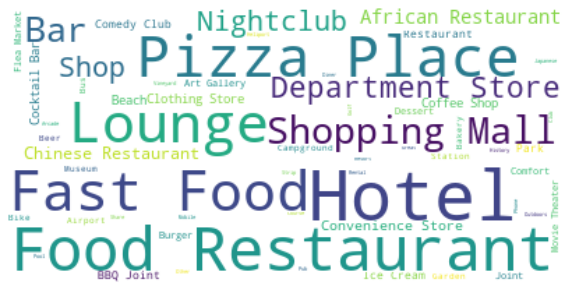

In [89]:
# Generate the WordCloud
top_venues_wc.generate(words)

# Set the Size
plt.figure(figsize=(10, 15))

# Display the WC
plt.imshow(top_venues_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So the most common or freqent venues in all of Lagos State are:-
<br>**Food Restaurant**,
<br>**Hotel**,
<br>**Fast Food**,
<br>**Shopping Mall**,
<br>**Lounge**,
<br>**Restaurant**,
<br>**Pizza Place**

### To Recap:

In this notebook we explored Lagos State using it's [wikipedia page](https://en.wikipedia.org/wiki/List_of_Lagos_State_local_government_areas_by_population). We scraped the page using Beautiful soup and acquired its data using the request library and eventually we converted same from JSON format to a DataFrame using the json_normalize module.<br>
We used the foursquare API to get the details of venues for each location, using the geopy library to convert addresses to latitude and longitude.<br>
<br> Then we clustered Lagos state into 5 clusters using the K-means algorithm, and finally we displayed the Top venue categories in Lagos state using a word cloud object.
<br> 